In [1]:
#Importing basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing training data
df = pd.read_csv('Data\dataset_treino.csv')

In [3]:
#First glimpse in the data
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### On the first look it appears tha we don't have NA values, however, there are a lot of inconsistent values like 'bloody_pressure' or 'bmi' minimals as 0.
### It's safe to assume that the NA values was record in the data base as 0 but not all 0s can be assume as NA values, like 'pregnancy_number', that a 0 is a very possible value.

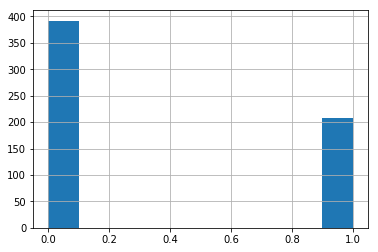

In [18]:
#Distribution of class
df['classe'].hist()

### A bit unbalanced

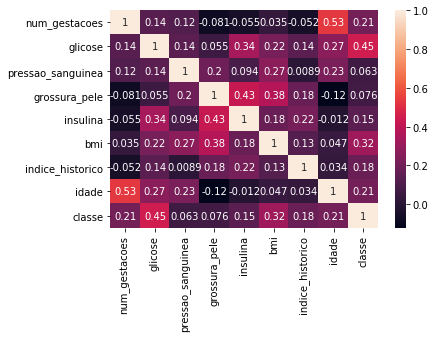

In [4]:
#Geting some correlations to find what parameter to start
sns.heatmap(df.drop('id', axis=1).corr(), annot=True)

### It seems that 'glicose' has the most powerfull possibility to explain 'class'. We'll start here.

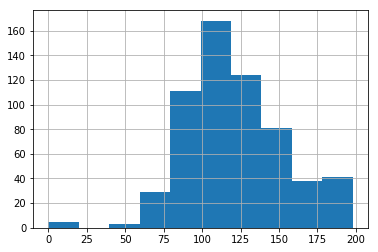

In [5]:
df['glicose'].hist()

In [6]:
#Getting rid of inconsistet values
meanGlicose = df[df['glicose'] > 20]['glicose'].mean()
df['glicose'] = [meanGlicose if x < 20 else x for x in df['glicose']]

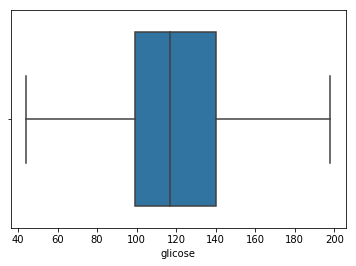

In [7]:
#Searching for outliers
sns.boxplot(df['glicose'])

### It seems we got ourselves a clean attribute. Let's run some tests :)

In [8]:
x = df[['glicose']]
y = df['classe']

In [13]:
#Spliting the data in train/test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [14]:
#Predicting with a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.7333333333333333

### Not bad at all to start with
### Let's try differents models

In [15]:
#Trying KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model2 = knn.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7222222222222222

In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 50)
model3 = rfc.fit(xtrain,ytrain)
model3.score(xtest,ytest)

0.6944444444444444

In [17]:
#SVM
from sklearn.svm import SVC
svm = SVC()
model4 = svm.fit(xtrain,ytrain)
model4.score(xtest,ytest)

0.7222222222222222

In [ ]:
df['bmi'].hist()

In [ ]:
meanbmi = df[df['bmi'] > 10]['bmi'].mean()

In [ ]:
df['bmi'] = [meanbmi if x < 10 else x for x in df['bmi']]

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:
df['bmi'] = df[df['bmi'] < 50]['bmi']

In [ ]:
df['num_gestacoes'].hist()

In [ ]:
sns.boxplot(df['num_gestacoes'])

In [ ]:
df['num_gestacoes'] = df[df['num_gestacoes'] < 13]['num_gestacoes']

In [ ]:
df['indice_historico'].hist()

In [ ]:
sns.boxplot(df['indice_historico'])

In [ ]:
df['indice_historico'] = df[df['indice_historico'] < 1.2]['indice_historico']

In [ ]:
from sklearn.preprocessing import scale, StandardScaler, minmax_scale

In [ ]:
scale = StandardScaler()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

In [ ]:
pred = ['id', 'idade', 'pressao_sanguinea', 'grossura_pele',
       'insulina', 'classe']

In [ ]:
x = scale.fit_transform(x)

In [ ]:
x[1]

In [ ]:
#rfc = rsrfc.best_estimator_

In [ ]:
#pd.concat([pd.Series(model3.feature_importances_), pd.Series(df.drop(['id','classe'], axis=1).columns)], axis=1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lrGrid = {'C' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9]}
rslr = RandomizedSearchCV(lr, lrGrid, cv = 6, n_iter=100)
rslr.fit(x,y)
print("Best: %f using %s" % (rslr.best_score_, rslr.best_params_))

In [ ]:
knnGrid = {'n_neighbors' : range(1,20)}
rsknn = RandomizedSearchCV(knn, knnGrid, cv = 6, n_iter=100)
rsknn.fit(x,y)
print("Best: %f using %s" % (rsknn.best_score_, rsknn.best_params_))

In [ ]:
rfcGrid = {'n_estimators' :range(100,200) ,
        'max_depth' : range(1, 40),
        'min_samples_split': range(2, 40),
        'min_samples_leaf' : range(2, 40)}
rsrfc = RandomizedSearchCV(rfc, rfcGrid, cv = 6, n_iter=100)
rsrfc.fit(x,y)
print("Best: %f using %s" % (rsrfc.best_score_, rsrfc.best_params_))

In [ ]:
svmGrid = {'C' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9],
          'gamma' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9],
          'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
rssvm = RandomizedSearchCV(svm, svmGrid, cv = 6, n_iter=100)
rssvm.fit(x,y)
print("Best: %f using %s" % (rssvm.best_score_, rssvm.best_params_))

In [ ]:
mlp = mlp = MLPClassifier(solver= 'sgd', hidden_layer_sizes= (84), max_iter= 500, random_state=666)
mlpGrid = {'hidden_layer_sizes' : (range(10,30), range(10,30), range(10, 30))}
rsmlp = RandomizedSearchCV(mlp, mlpGrid, cv = 6, n_iter=100)
rsmlp.fit(x,y)
print("Best: %f using %s" % (rsmlp.best_score_, rsmlp.best_params_))